In [43]:
import pandas as pd

## DataFrames

- The `pandas` module provides a powerful data-structure called a data frame.

- It is similar, but not identical to an Excel spreadsheet,

- A data frame has multiple columns, each of which can hold a *different* type of value.

- Like a series, it has an index which provides a label for each and every row. 


    

## Loading Files with Pandas
- We used Pandas in an earlier notebook to load the iris data file.  
- Whenver you have a dataset with a variety of fields of various types, loading it into Pandas is a good strategy.
- You can load data from Azure, from a local file, or from a url.  







In [44]:
# We can load .csv files, but also .zip files which contain .csv files
df = pd.read_csv('titles.csv')
cast = pd.read_csv('cast.csv', sep='|')

## Taking a quick look of the dataframe.

- We can quickly see the top contents of a dataframe by using `df.head()`.
- By default, this will show the first 5 entries, but `head()` takes an argument to specify if you want more or less.
- A similar method is `.tail()` which shows the bottom entries.

In [45]:
cast.head()

,name,title,year,rating,votes
0,Ève Francis,Spanish Fiesta,2019,6.9,29
1,Gabriel Gabrio,Spanish Fiesta,2019,6.9,29
2,Jean Toulout,Spanish Fiesta,2019,6.9,29
3,Gaston Modot,Spanish Fiesta,2019,6.9,29
4,Antonio Cañero,La tierra de los toros,2000,5.4,14


In [46]:
cast.head(3)

,name,title,year,rating,votes
0,Ève Francis,Spanish Fiesta,2019,6.9,29
1,Gabriel Gabrio,Spanish Fiesta,2019,6.9,29
2,Jean Toulout,Spanish Fiesta,2019,6.9,29


## Functions and DataFrames

- We can do calculations and functions with dataframes just like series.
- Functions will typically return a dataframe or a series, depending. 
- To make a copy, don't assign the dataframe to a new variable, instead use the `copy` method shown below:  
`df2= df.copy()` (same as lists)

In [47]:
#Info
nulls=cast.isnull()
print(nulls, "\n", type(nulls))

nullsum=nulls.sum()

print("\nNull sum for each column \n", nullsum, "\n", type(nullsum))

# print("\nWe can slice these results to get the answer for x \n", nullsum.x)
# type(nullsum.x)

         name  title   year  rating  votes
0       False  False  False   False  False
1       False  False  False   False  False
2       False  False  False   False  False
3       False  False  False   False  False
4       False  False  False   False  False
...       ...    ...    ...     ...    ...
851790  False  False  False   False  False
851791  False  False  False   False  False
851792  False  False  False   False  False
851793  False  False  False   False  False
851794  False  False  False   False  False

[851795 rows x 5 columns] 
 <class 'pandas.core.frame.DataFrame'>

Null sum for each column 
 name      0
title     0
year      0
rating    0
votes     0
dtype: int64 
 <class 'pandas.core.series.Series'>


## Summary statistics
- To quickly obtain summary statistics on numerical values use the `describe` method.
- You will get a warning if there are missing values.

In [48]:
cast.describe()

,year,rating,votes
count,851795.000000,851795.000000,8.517950e+05
mean,2002.935385,6.032785,4.104524e+03
std,14.500983,1.390772,3.673918e+04
min,1970.000000,1.000000,5.000000e+00
25%,1992.000000,5.200000,1.900000e+01
50%,2008.000000,6.200000,6.600000e+01
75%,2015.000000,7.000000,3.480000e+02
max,2021.000000,10.000000,2.476378e+06


### Data Types and shape
- Each will have an inferred data type. 

In [49]:
print(cast.dtypes)

name       object
title      object
year        int64
rating    float64
votes       int64
dtype: object


In [50]:
# .shape gives the total number of rows and columns
print(df.shape)
# .len gives the total number of rows
print(len(df))

(213665, 4)
213665


# Accessing the Row and Column Labels

- The row labels (index) can be accessed through `df.index`.
- The column labels can be accessed through `df.columns`.


In [51]:
cast.index

RangeIndex(start=0, stop=851795, step=1)

In [52]:
cast.columns

Index(['name', 'title', 'year', 'rating', 'votes'], dtype='object')

## Indexing/Slicing Rows of DataFrames
- Simple ways of selecting all rows and columns (`df[:]`)
- Rows can be accessed via a key or a integer corresponding to the row number. 
- Omitting a value generally means *all values* before or after an item.
- When we retrieve a single or mulitiple rows, the result is a Dataframe.
- Several ways, either directly, with `iloc`, or with `loc`. (See Examples).
- Read more [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)



## Selecting Rows
- Similarly, we also might want to select out rows, and we can utilize the same syntax.
- [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html)

In [53]:

## Selecting rows
print (df[0:3])     #Select rows 1-3
print ("----------")
print (df.iloc[0:3,:])     #Select rows 1-3
print ("----------")
print (df.iloc[0:3,])      #Select rows 1-3
print ("----------")
print (df.iloc[0:3])       #Select rows 1-3
print ("----------")
print (df.iloc[[0,1,2]])   #Select rows 1, 2, and 4


                    title  year  rating  votes
0          Spanish Fiesta  2019     6.9     29
1  La tierra de los toros  2000     5.4     14
2           Dama de noche  1993     6.0     25
----------
                    title  year  rating  votes
0          Spanish Fiesta  2019     6.9     29
1  La tierra de los toros  2000     5.4     14
2           Dama de noche  1993     6.0     25
----------
                    title  year  rating  votes
0          Spanish Fiesta  2019     6.9     29
1  La tierra de los toros  2000     5.4     14
2           Dama de noche  1993     6.0     25
----------
                    title  year  rating  votes
0          Spanish Fiesta  2019     6.9     29
1  La tierra de los toros  2000     5.4     14
2           Dama de noche  1993     6.0     25
----------
                    title  year  rating  votes
0          Spanish Fiesta  2019     6.9     29
1  La tierra de los toros  2000     5.4     14
2           Dama de noche  1993     6.0     25


## Selecting a particular column
- We can filter a particular row by indexing it by name as `df['column_name']
- If the column name is in lower case without spaces, we can call it as `df.column_name`

In [54]:
cast['title'].head()

0            Spanish Fiesta
1            Spanish Fiesta
2            Spanish Fiesta
3            Spanish Fiesta
4    La tierra de los toros
Name: title, dtype: object

## Pandas Series 
- A `dataframe` can be thought of as a collection of `series` objects.
- You can distinguish between a `dataframe` and `series` by the formatting in a jupyter notebook.
- Any column selected as `df['column_name']` will give you a series.
- If you want a dataframe with a single column instead of a series, you can pass a single item list to a dataframe as `df[['column_name']]`
![](https://storage.googleapis.com/lds-media/images/series-and-dataframe.original.png)

In [55]:
df.head()

,title,year,rating,votes
0,Spanish Fiesta,2019,6.9,29
1,La tierra de los toros,2000,5.4,14
2,Dama de noche,1993,6.0,25
3,Frivolinas,2014,5.6,19
4,Mya ga naing,1996,7.5,21


In [56]:
df['title']

0                   Spanish Fiesta
1           La tierra de los toros
2                    Dama de noche
3                       Frivolinas
4                     Mya ga naing
                    ...           
213660                   Safeguard
213661    Il talento del calabrone
213662                       Coven
213663         The Secret of China
213664         Kuambil Lagi Hatiku
Name: title, Length: 213665, dtype: object

In [57]:
type(df['title'])

pandas.core.series.Series

In [58]:
type(df[['title']])

pandas.core.frame.DataFrame

## Intro to Filters (Logical indexing)
- Filters are the selection of rows based on criteria.
- We can select based on specific criteria.
- These criteria can be connected together.
- Most of the time we won't specfically assign selection critia to a list. 

In [59]:
# At the foundation of the filter is a boolean array based on some type of condition. 
print(df)
df['year'] >= 2000

                           title  year  rating  votes
0                 Spanish Fiesta  2019     6.9     29
1         La tierra de los toros  2000     5.4     14
2                  Dama de noche  1993     6.0     25
3                     Frivolinas  2014     5.6     19
4                   Mya ga naing  1996     7.5     21
...                          ...   ...     ...    ...
213660                 Safeguard  2020     3.5    225
213661  Il talento del calabrone  2020     5.8   1197
213662                     Coven  2020     6.4   4014
213663       The Secret of China  2019     3.8     14
213664       Kuambil Lagi Hatiku  2019     8.3      6

[213665 rows x 4 columns]


0          True
1          True
2         False
3          True
4         False
          ...  
213660     True
213661     True
213662     True
213663     True
213664     True
Name: year, Length: 213665, dtype: bool

In [60]:
#notice how the logical statement is inside the dataframe specification.  This creates an intermediate boolean array. 
df[df['year'] >= 2000]

,title,year,rating,votes
0,Spanish Fiesta,2019,6.9,29
1,La tierra de los toros,2000,5.4,14
3,Frivolinas,2014,5.6,19
6,Kate & Leopold,2001,6.4,81684
7,Muhomatsu no issho,2008,7.3,108
...,...,...,...,...
213660,Safeguard,2020,3.5,225
213661,Il talento del calabrone,2020,5.8,1197
213662,Coven,2020,6.4,4014
213663,The Secret of China,2019,3.8,14


In [61]:
#This is an alternate method where we first set the boolean array. 
included=df['year'] >= 2000
df[included]


,title,year,rating,votes
0,Spanish Fiesta,2019,6.9,29
1,La tierra de los toros,2000,5.4,14
3,Frivolinas,2014,5.6,19
6,Kate & Leopold,2001,6.4,81684
7,Muhomatsu no issho,2008,7.3,108
...,...,...,...,...
213660,Safeguard,2020,3.5,225
213661,Il talento del calabrone,2020,5.8,1197
213662,Coven,2020,6.4,4014
213663,The Secret of China,2019,3.8,14


In [62]:
#We can now generate a vector based on a critera and then use this for selection
select = df['year']>=2000
print(select,type(select))
#print(df.loc[select,:]) #Notice by including only one variable we are selecting rows and all columns.
print(df[select]) #Notice by including only one variable we are selecting rows and all columns.

0          True
1          True
2         False
3          True
4         False
          ...  
213660     True
213661     True
213662     True
213663     True
213664     True
Name: year, Length: 213665, dtype: bool <class 'pandas.core.series.Series'>
                           title  year  rating  votes
0                 Spanish Fiesta  2019     6.9     29
1         La tierra de los toros  2000     5.4     14
3                     Frivolinas  2014     5.6     19
6                 Kate & Leopold  2001     6.4  81684
7             Muhomatsu no issho  2008     7.3    108
...                          ...   ...     ...    ...
213660                 Safeguard  2020     3.5    225
213661  Il talento del calabrone  2020     5.8   1197
213662                     Coven  2020     6.4   4014
213663       The Secret of China  2019     3.8     14
213664       Kuambil Lagi Hatiku  2019     8.3      6

[145678 rows x 4 columns]


## Operations on `Series` 
- By a single command, we can operate on all rows of a series.
- For eg. to get the decade in which the movie is released, we could perform `df['year']//10 * 10`

In [63]:
# Operations on series
(df.year //10 * 10)

0         2010
1         2000
2         1990
3         2010
4         1990
          ... 
213660    2020
213661    2020
213662    2020
213663    2010
213664    2010
Name: year, Length: 213665, dtype: int64

<Axes: xlabel='year'>

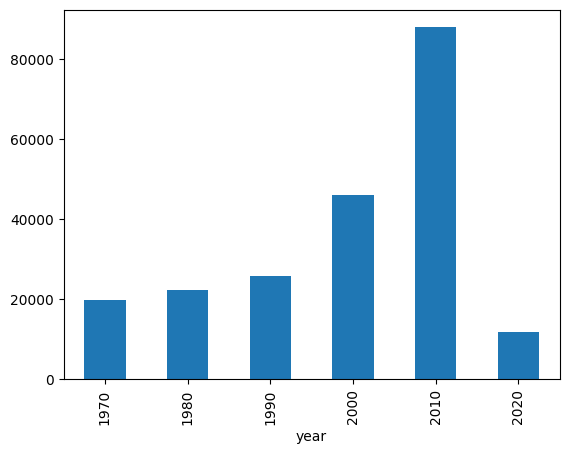

In [64]:
# use value_counts() to aggregate decades
c = (df.year//10 *10).value_counts()
# use .sort_index() to get index sorted
c = c.sort_index()
c.head()
# use .plot(kind='bar') to get a bar plot
c.plot(kind = 'bar')

## Pandas indexing
- We can drop the default numerical index by casting one of the columns as an index using `set_index()`.
- We can then use `sort_index()` method which allows quick lookups of data.

In [65]:
%%time
cast[(cast.title=='The Karate Kid') & (cast.year == 1984)].head()

CPU times: total: 15.6 ms
Wall time: 36 ms


,name,title,year,rating,votes
56354,Ralph Macchio,The Karate Kid,1984,7.3,209089
56355,Pat Morita,The Karate Kid,1984,7.3,209089
56356,Elisabeth Shue,The Karate Kid,1984,7.3,209089
56357,Martin Kove,The Karate Kid,1984,7.3,209089


In [38]:
# Setting the index to movie titles and sorting it 
c = cast.set_index(['title']).sort_index()
c.head()

,name,year,rating,votes;;
title,,,,
!Women Art Revolution,Lynn Hershman-Leeson,2010.0,6.8,243;;
!Women Art Revolution,B. Ruby Rich,2010.0,6.8,243;;
#1 Serial Killer,Jason Tobin,2013.0,5.5,57;;
#1 Serial Killer,Eugenia Yuan,2013.0,5.5,57;;
#1 Serial Killer,Shoshana Bush,2013.0,5.5,57;;


In [39]:
%%time
# Comparing its speed to the operation above 
c.loc['The Karate Kid']

CPU times: total: 109 ms
Wall time: 117 ms


,name,year,rating,votes;;
title,,,,
The Karate Kid,Taraji P. Henson,2010.0,6.2,171641;;
The Karate Kid,Jackie Chan,2010.0,6.2,171641;;
The Karate Kid,Martin Kove,1984.0,7.3,209089;;
The Karate Kid,Elisabeth Shue,1984.0,7.3,209089;;
The Karate Kid,Pat Morita,1984.0,7.3,209089;;
The Karate Kid,Ralph Macchio,1984.0,7.3,209089;;
The Karate Kid,Wenwen Han,2010.0,6.2,171641;;
The Karate Kid,Jaden Smith,2010.0,6.2,171641;;


## Groupby operations
- Since it is so common to pull information from various columns, we have an aggregator method called `groupby()`
- Using `groupby()` will return a `groupby` object. We can then use methods such as `size()`,`mean()`,`max()`,`min()` on this which will combine the remaining columns.
- The output of a `groupby()` operation maybe a `Series` or a `Dataframe` depending on the number of columns after the operation. The input of `groupby()` could be any column, or even an operation on a particular column.
![Example of a `groupby()` operation](https://miro.medium.com/max/1838/0*m-puRNwcnUl5zZ4O)

In [40]:
# Finding the total number of movies by Leonardo Dicaprio in each year
c = cast[cast.name == 'Leonardo DiCaprio']
c.groupby('year').size()

year
1993.0    2
1995.0    3
1996.0    2
1997.0    1
1998.0    2
2000.0    1
2001.0    1
2002.0    2
2004.0    1
2006.0    2
2007.0    1
2008.0    3
2009.0    1
2010.0    4
2011.0    1
2012.0    2
2013.0    2
2015.0    1
2016.0    1
2017.0    1
2019.0    2
dtype: int64

In [41]:
# Finding the total number of movies by Leonardo Dicaprio in each decade
c = cast[cast.name == 'Leonardo DiCaprio']
c.groupby(c.year//10*10).size()

year
1990.0    10
2000.0    12
2010.0    14
dtype: int64

## Merging Dataframes
- Often you need to combine dataframes with similar information
- We can use the `.merge()` method to do this.
- Below we combine information from `cast.csv` and `release_dates.csv`.

In [42]:
# We call a new dataframe that gives us the release dates for each of the movies 
release_dates = pd.read_csv('data/release_dates.zip')
release_dates.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/release_dates.zip'

In [167]:
# Selecting all roles in movies by Leonardo DiCaprio
c = cast[cast.name == 'Leonardo DiCaprio']
c.head()

,title,year,name,type,character,n
3033,Blood Diamond,2006,Leonardo DiCaprio,actor,Danny Archer,1.0
3034,Body of Lies,2008,Leonardo DiCaprio,actor,Roger Ferris,1.0
3035,Catch Me If You Can,2002,Leonardo DiCaprio,actor,Frank Abagnale Jr.,1.0
3036,Celebrity,1998,Leonardo DiCaprio,actor,Brandon Darrow,93.0
3037,Django Unchained,2012,Leonardo DiCaprio,actor,Calvin Candie,3.0


In [168]:
# Merging with release_dates.csv to get information on the release dates of the above movies
d = c.merge(release_dates)
d.head()

,title,year,name,type,character,n,country,date
0,Blood Diamond,2006,Leonardo DiCaprio,actor,Danny Archer,1.0,USA,2006-12-08
1,Blood Diamond,2006,Leonardo DiCaprio,actor,Danny Archer,1.0,Australia,2007-01-04
2,Blood Diamond,2006,Leonardo DiCaprio,actor,Danny Archer,1.0,Singapore,2007-01-04
3,Blood Diamond,2006,Leonardo DiCaprio,actor,Danny Archer,1.0,Thailand,2007-01-04
4,Blood Diamond,2006,Leonardo DiCaprio,actor,Danny Archer,1.0,Brazil,2007-01-05


In [169]:
# Checking the dtypes
d.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
country       object
date          object
dtype: object

In [170]:
# Since the date column is not a datetime object by default, we will need to convert it
d.date = pd.to_datetime(d.date)

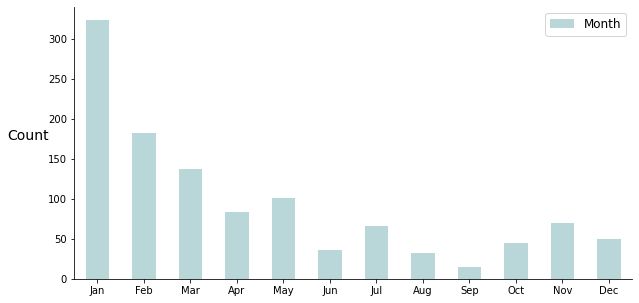

In [171]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))
# color = ['#CDC8E1','#B9D6D9','#EA9A98']
# d.groupby(['name',d.date.dt.month]).size().unstack(0).apply(lambda x: x / x.max()).plot(kind='bar',ax=ax,color = color,width=0.6)
d.date.dt.month.value_counts().sort_index().plot(kind='bar',ax=ax,color = '#B9D6D9',label='Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=0)
ax.legend(fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('None')
ax.set_ylabel('Count',fontsize=14,rotation=0,labelpad=20);

## Saving Dataframes to disk
- Often you need save your analysis to your system.
- You can do this by using the `.to_csv()` method.
- `.to_csv()` takes a filename as an argument and several optional arguments. More [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
# This will save the file to the disk at the location where the pandas file is used
d.to_csv('filename.csv',index=False)